<font size=6>Chapter 7 - Exercise on C4.5/CART classifier</font>

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score

$X_1$ and $X_2$ are two uniformly distributed random variables in the range $[-1, 1]$. Class $C$ is defined as
$C = sign(-2sign(X_1)|X_1|^{2/3} + 4X_2^2)$

In [140]:
def evaluate_C(X):
    return np.sign(-2 * np.multiply(np.sign(X[:, 0]), np.power(np.abs(X[:, 0]), 2/3)) + 4 * np.power(X[:, 1], 2))


def custom_rand(rows, cols=0, range=(0, 1)):
    assert range[0] <= range[1]
    return (range[1] - range[0]) * np.random.rand(rows, cols) + range[0]

<font size=4>1. Randomly generate $N_{train}$ training points (i.e. $X_1$, $X_2$ and the corrisponding class). Start with $N_{train} = 100$ and then increase it.</font>

In [147]:
N_train = 1000
X_train = custom_rand(N_train, 2, range=(-1, 1))
Y_train = evaluate_C(X_train)

<font size=4>2. Plot $X_2$ versus $X_1$ with a *red* point if the class is $-1$, with a *blue* point if the class is $+1$.</font>

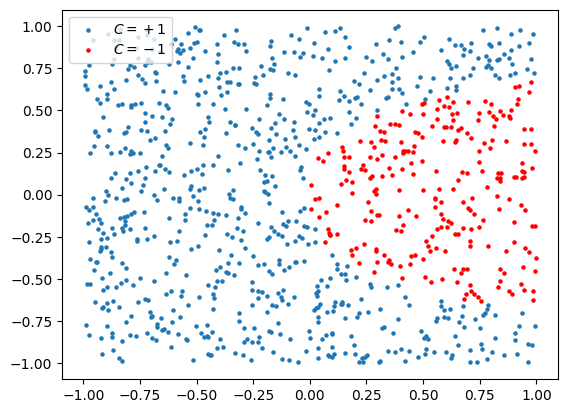

In [148]:
points_size = 5
i_blue = np.argwhere(Y_train == 1)
i_red = np.argwhere(Y_train == -1)
plt.figure()
plt.scatter(X_train[i_blue, 0], X_train[i_blue, 1], s=points_size)
plt.scatter(X_train[i_red, 0], X_train[i_red, 1], s=points_size, c='red')
labels = ['$C = +1$', '$C = -1$']
plt.legend(labels, loc='upper left')
plt.show()

<font size=4>3. Generate the **C4.5 decision tree** using these training points</font>

In [149]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

<font size=4>4. Test the decision tree on other $N_{test} = 20000$ randomly taken samples, generating for each of them the estimated class $\^C$.</font>

In [150]:
N_test = 20000
X_test = custom_rand(N_test, 2, range=(-1, 1))
Y_test = evaluate_C(X_test)
Y_test_hat = clf.predict(X_test)

<font size=4>5. For the test dataset, plot $X_2$ versus $X_1$ with a *red* point if $\^C = -1$, with a *blue* point if $\^C = +1$.</font>

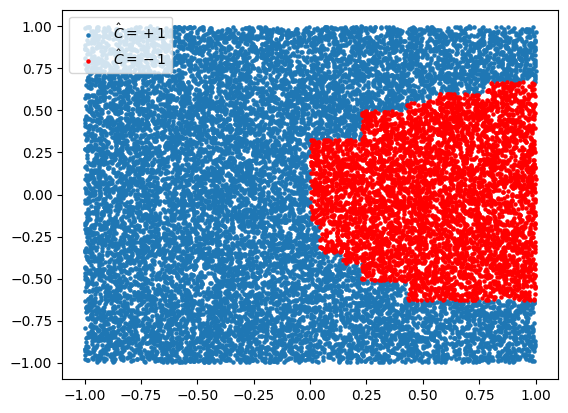

In [151]:
points_size = 5
i_blue = np.argwhere(Y_test_hat == 1)
i_red = np.argwhere(Y_test_hat == -1)
plt.figure()
plt.scatter(X_test[i_blue, 0], X_test[i_blue, 1], s=points_size)
plt.scatter(X_test[i_red, 0], X_test[i_red, 1], s=points_size, c='red')
labels = ['$\^C = +1$', '$\^C = -1$']
plt.legend(labels, loc='upper left')
plt.show()

<font size=4>6. Measure the accuracy, i.e. $P(\^C \neq C)$, on the test dataset.</font>

In [152]:
print('Accuracy = ', accuracy_score(Y_test, Y_test_hat))

Accuracy =  0.98245
